
# **Artificial Intelligence  FEUP**
## **2nd Assignment - Supervised Learning**
### **3rd Year - 2nd Semester - 2024/2025**



# Import Libraries and Set Options

Import necessary libraries for data handling, visualization, and machine learning.  
Set pandas display options and seaborn plot style for better readability.

- **pandas** for loading CSV files and handling structured data efficiently.
- **NumPy** for fast numerical operations and array manipulations.
- **matplotlib** and **seaborn** to visualize data and uncover patterns through charts and plots.
- **scikit-learn** for machine learning tasks like splitting datasets, scaling features, training models, and measuring their performance with built-in metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold, f_classif


sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load and Preview Dataset

Load the dataset from a CSV file and take a quick look at the first few rows.  
Also, check the shape, data types, and basic statistics of the dataset.

In [2]:
df = pd.read_csv('./original/train.csv')
df.head()  # Preview dataset

print(f"Dataset shape: {df.shape}")
df.info()
df.describe()

Dataset shape: (159256, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  in

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


# Check and Handle Missing Values

Identify if there are any missing values in the dataset.  
If missing values exist, fill them with the median of the respective columns.

In [3]:
missing_total = df.isnull().sum().sum()
print(f"Valores em falta no dataset de treino: {missing_total}")

if missing_total > 0:
    print("Preencher valores em falta com a mediana.")
    df = df.fillna(df.median(numeric_only=True))
else:
    print("Nenhum valor em falta encontrado.")

Valores em falta no dataset de treino: 0
Nenhum valor em falta encontrado.


# Exploratory Data Analysis (EDA)

Visualize the distribution of the target variable (smoking).  
Plot a correlation heatmap to understand relationships between numerical features.

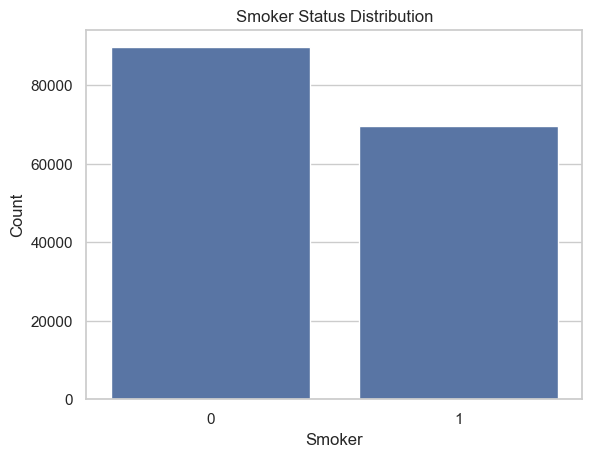

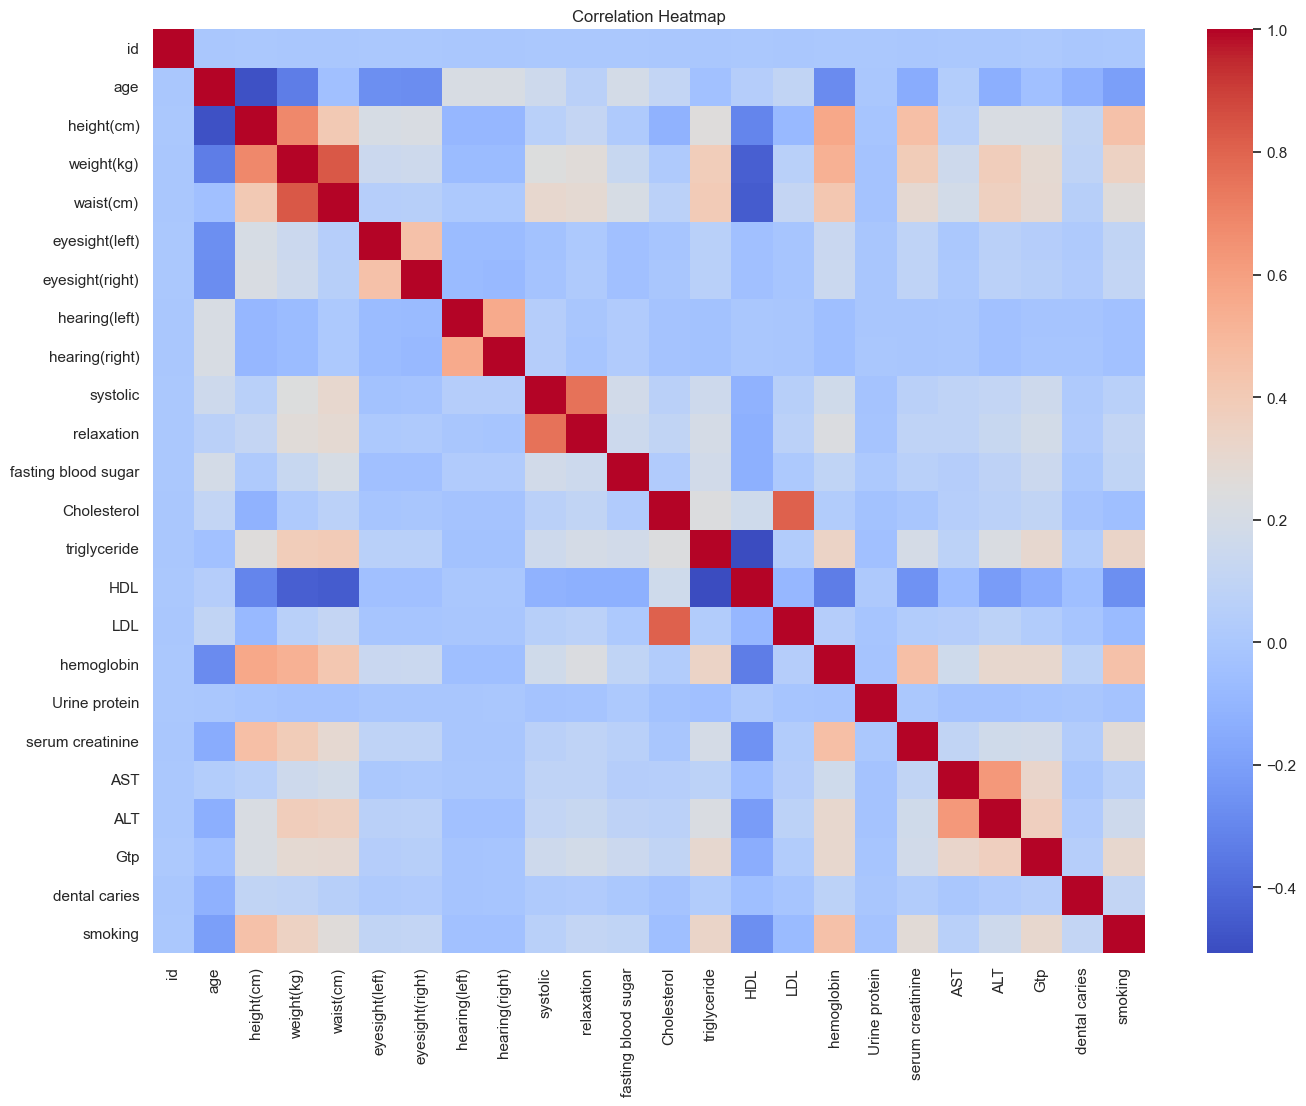

In [4]:
# Distribution of smoking variable
sns.countplot(x='smoking', data=df)
plt.title("Smoker Status Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of Features by Smoking Status

Create boxplots for selected features grouped by smoking status to identify patterns or differences.

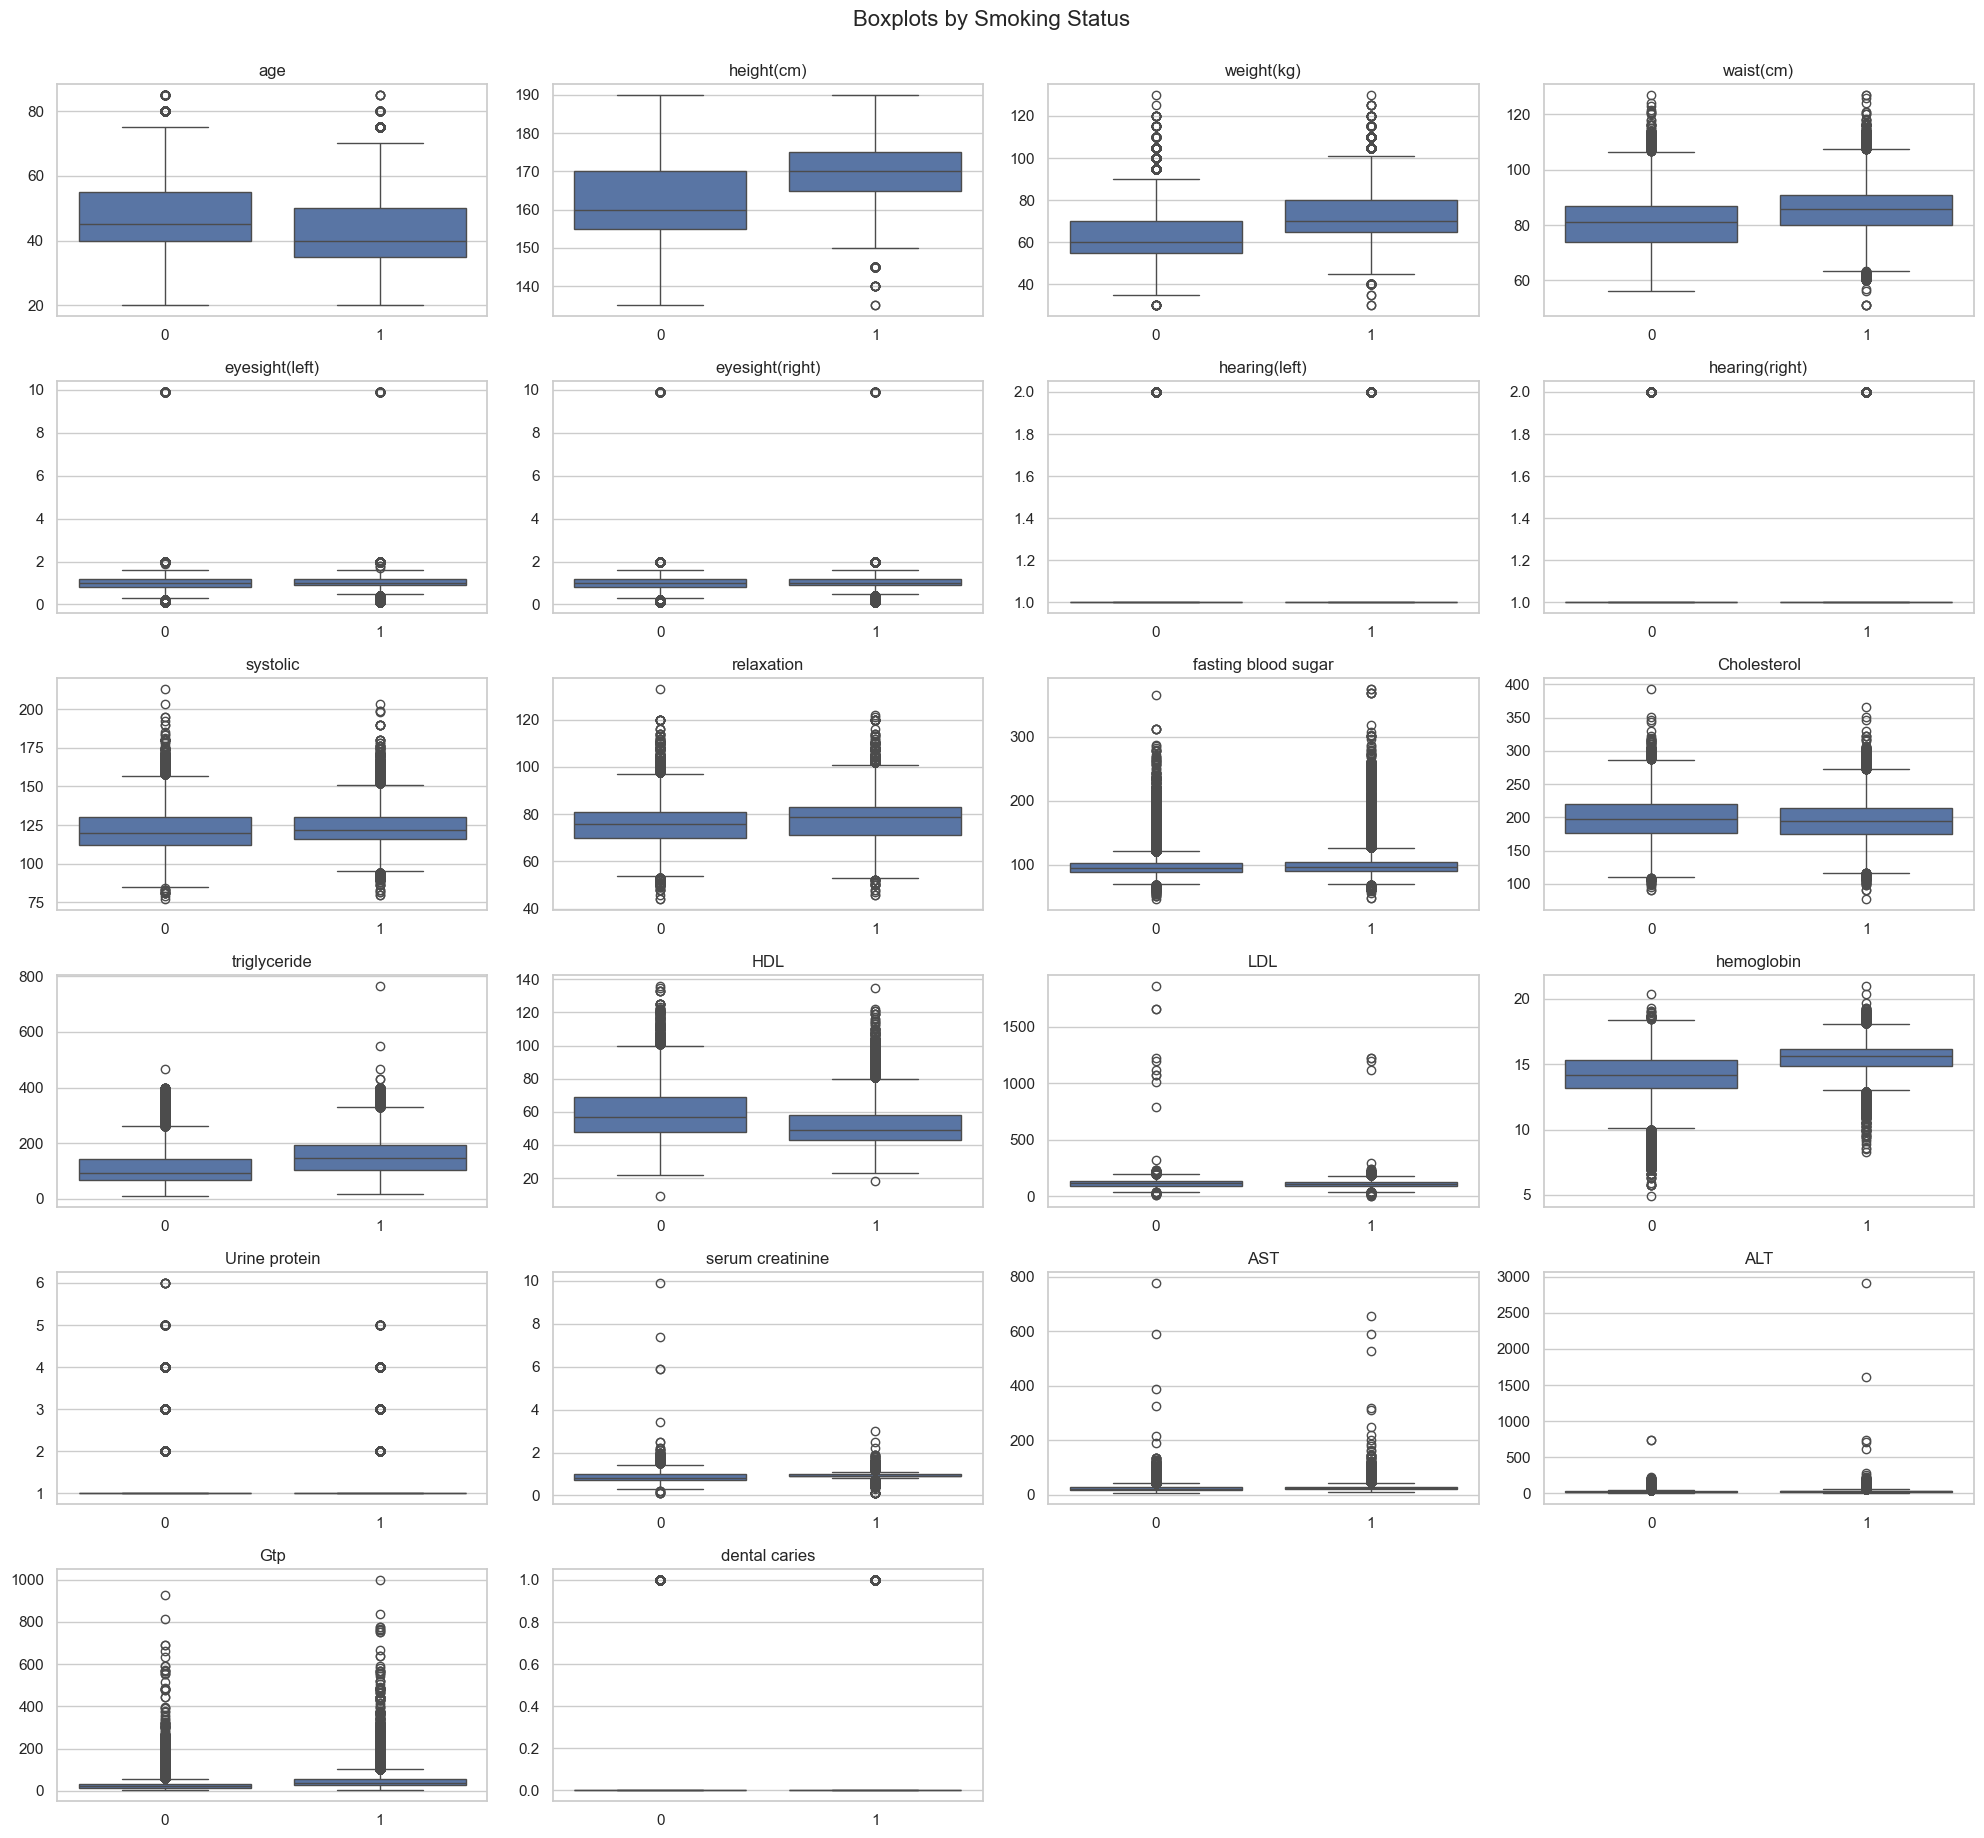

'\nfor feature in features:\n    plt.figure(figsize=(8, 5))\n    sns.boxplot(x=\'smoking\', y=feature, data=df)\n    plt.title(f"{feature} by Smoking Status")\n    plt.xlabel("Smoker")\n    plt.ylabel(feature)\n    plt.tight_layout()\n    plt.show()\n'

In [ ]:
features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
            'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
            'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
            'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

import math

cols = 4  # 3 gráficos por linha
rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='smoking', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remover eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots by Smoking Status", fontsize=16, y=1.02)
plt.show()

## Data Cleaning -> Removing Irrelevant Features

Based on the boxplots and visual inspection, some features show little to no difference between smoker and non-smoker groups.  
These features will be removed to simplify the model and avoid noise.
The id column will also be removed, as it serves only as a unique identifier and carries no predictive information.

We drop the following irrelevant features:  
`id`, `Urine protein`, `hearing(left)`and `hearing(right)`.

In [6]:
df = df.drop(columns=['id'])

correlation_with_target = df.corr(numeric_only=True)['smoking'].drop('smoking')
correlation_sorted = correlation_with_target.abs().sort_values()
correlation_threshold = 0.05
irrelevant_features_corr = correlation_sorted[correlation_sorted < correlation_threshold].index.tolist()

selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=[np.number]))
low_variance_features = df.select_dtypes(include=[np.number]).columns[~selector.get_support()].tolist()

# ANOVA F-test 
X = df.select_dtypes(include=[np.number]).drop(columns='smoking')
y = df['smoking']
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
}).sort_values('p-Value')
insignificant_features = anova_results[anova_results['p-Value'] > 0.05]['Feature'].tolist()

final_irrelevant_features = list(set(irrelevant_features_corr + low_variance_features + insignificant_features))
print(f"Features consideradas irrelevantes estatisticamente ({len(final_irrelevant_features)}):\n", final_irrelevant_features)

df = df.drop(columns=final_irrelevant_features)
print("\nDataFrame atualizado com features relevantes apenas:")
print(df.columns)

Features consideradas irrelevantes estatisticamente (3):
 ['hearing(right)', 'hearing(left)', 'Urine protein']

DataFrame atualizado com features relevantes apenas:
Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


## Data Cleaning -> Removing Outliers (IQR Method)

Based on the visual inspection above, we remove outliers from selected numeric features using the Interquartile Range (IQR) method.

In [7]:
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('smoking').tolist()

print("Features numéricas a processar com IQR:", numeric_features)

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    before = df.shape[0]
    df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]
    after = df.shape[0]
    print(f"{feature}: removed {before - after} outliers")


Features numéricas a processar com IQR: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']
age: removed 682 outliers
height(cm): removed 439 outliers
weight(kg): removed 2270 outliers
waist(cm): removed 292 outliers
eyesight(left): removed 2225 outliers
eyesight(right): removed 1826 outliers
systolic: removed 1443 outliers
relaxation: removed 661 outliers
fasting blood sugar: removed 7410 outliers
Cholesterol: removed 292 outliers
triglyceride: removed 2572 outliers
HDL: removed 1560 outliers
LDL: removed 182 outliers
hemoglobin: removed 1332 outliers
serum creatinine: removed 4922 outliers
AST: removed 4823 outliers
ALT: removed 4519 outliers
Gtp: removed 6677 outliers
dental caries: removed 22610 outliers


# Data Splitting
Separate the dataset into features (X) and target variable (y).

In [8]:
X = df.drop(columns=['smoking'])  # features
y = df['smoking']  # target variable

# Feature Scaling

Normalize the feature data using standardization (mean=0, std=1) to improve model performance.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

Split the data into training and testing sets with stratification to maintain class distribution.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Train and Evaluate Machine Learning Models

We will implement and compare three supervised learning algorithms:

- Decision Tree
- k-Nearest Neighbors (k-NN)
- Support Vector Machine (SVM)

For each model, we will:

- Train on the training data
- Predict on the test data
- Evaluate performance using accuracy, precision, recall, F1-score, and confusion matrix


In [ ]:

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # testing time
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    testing_time = end_test - start_test

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Testing Time: {testing_time:.4f} seconds")
    print(f"Confusion Matrix:\n{cm}")
    print("-" * 30)

Training and evaluating Decision Tree...
Accuracy: 0.6960
Precision: 0.6076
Recall: 0.6105
F1 Score: 0.6090
Training Time: 1.1142 seconds
Testing Time: 0.0050 seconds
Confusion Matrix:
[[8496 2830]
 [2796 4382]]
------------------------------
Training and evaluating k-Nearest Neighbors...
Accuracy: 0.7268
Precision: 0.6413
Recall: 0.6712
F1 Score: 0.6559
Training Time: 0.0050 seconds
Testing Time: 3.0172 seconds
Confusion Matrix:
[[8631 2695]
 [2360 4818]]
------------------------------
Training and evaluating Support Vector Machine...
